# Importing Libraries and file

In [105]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
os.chdir('//Users//gaurav//Library//CloudStorage//OneDrive-Personal//Desktop//Oasis//Predicting House Price')

In [4]:
df=pd.read_csv('Housing.csv')

In [5]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Checking data 

In [6]:
df.shape

(545, 13)

In [7]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.select_dtypes(int)

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


# Cleaning data 

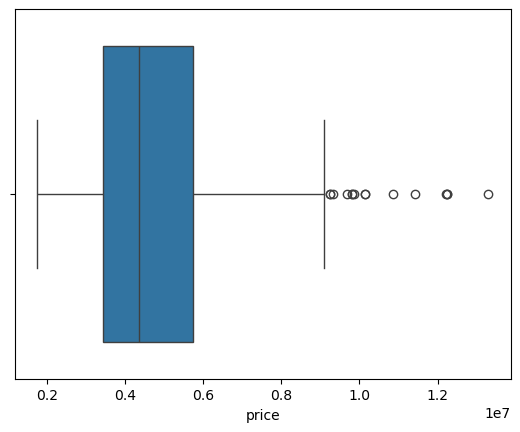

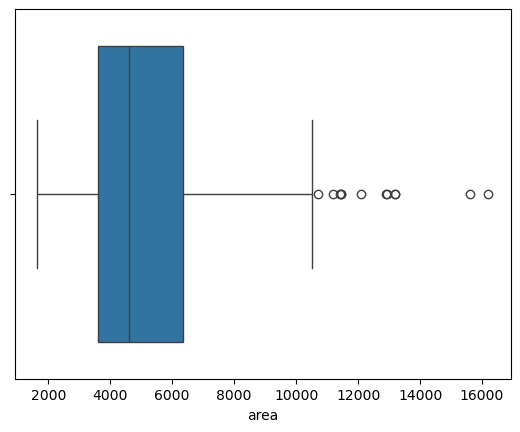

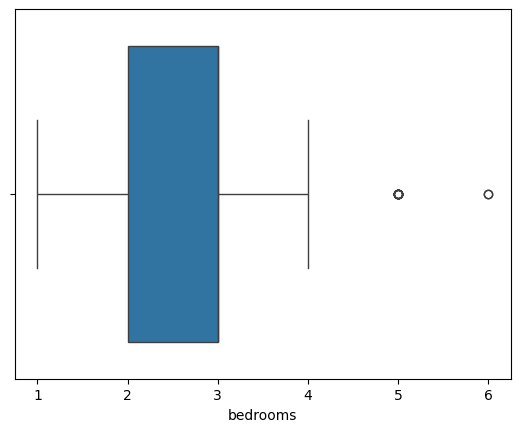

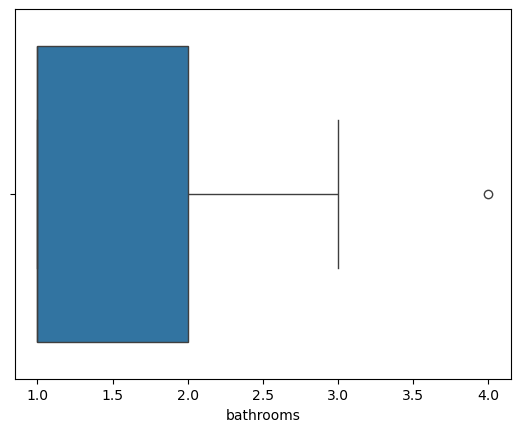

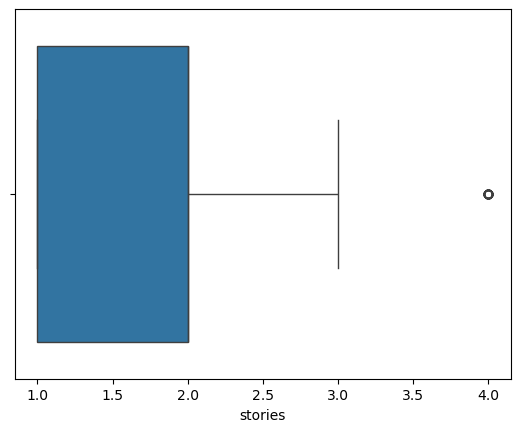

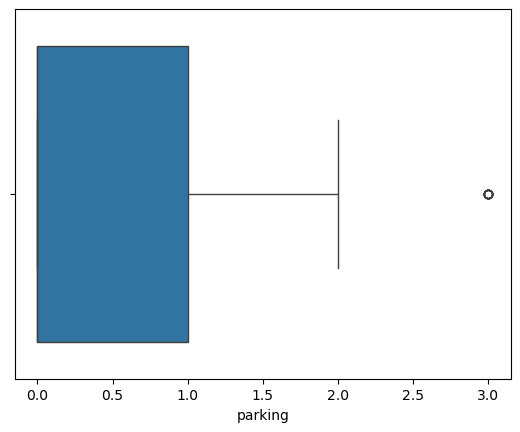

In [24]:
for i in ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']:
    sns.boxplot(data=df,x=i)
    plt.show()

In [26]:
for i in ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    ur=q3+1.5*iqr
    lr=q1-1.5*iqr
    df[i]=df[i].clip(lower=lr,upper=ur)

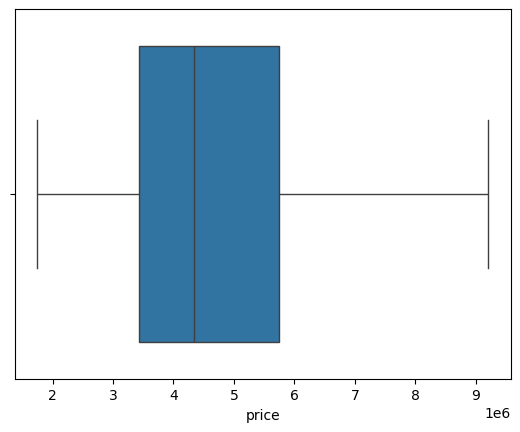

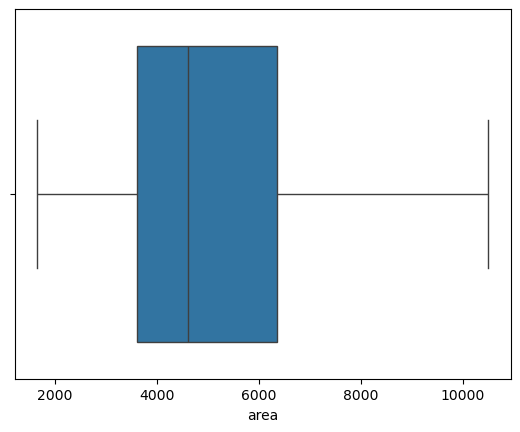

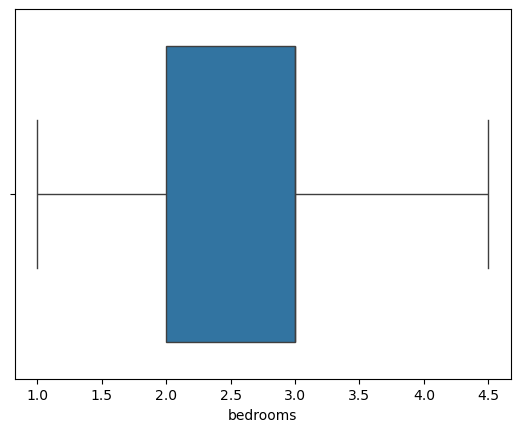

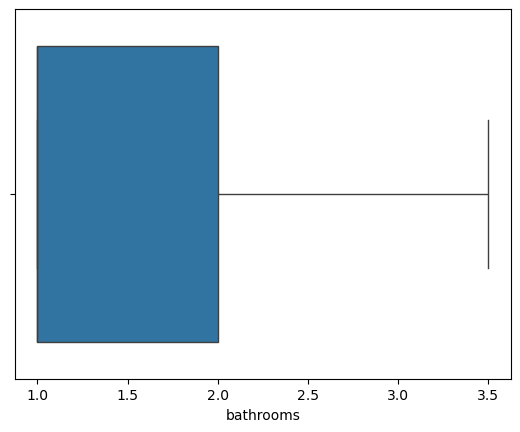

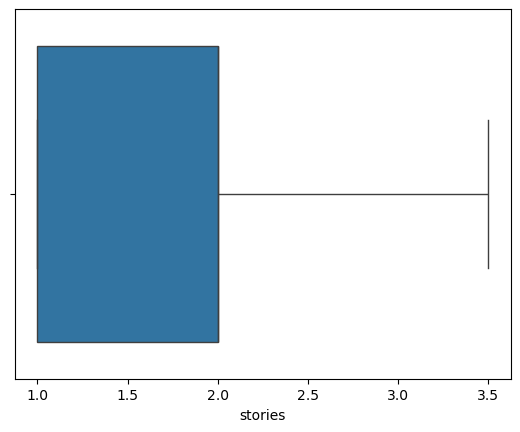

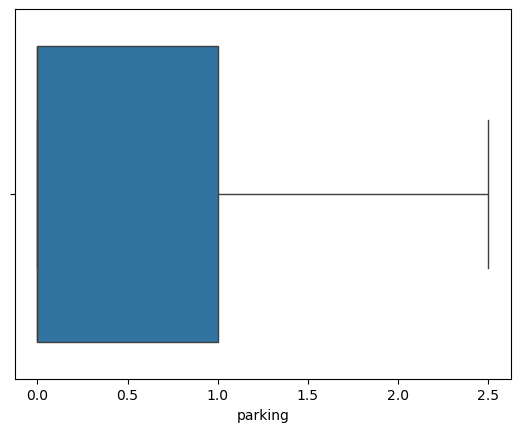

In [27]:
for i in ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']:
    sns.boxplot(data=df,x=i)
    plt.show()

ouliers are treated.

now to check how features and target are related to each other and which features has high correlation with our target we can make a correlation matrix for that, 
but first we need to convert all categorical value to numerical value,
and for that i am using one hot encoding 

### one hot encoding 

In [33]:
df.dtypes

price                 int64
area                  int64
bedrooms            float64
bathrooms           float64
stories             float64
mainroad             object
guestroom            object
basement             object
hotwaterheating      object
airconditioning      object
parking             float64
prefarea             object
furnishingstatus     object
dtype: object

In [50]:
encoded_df=pd.get_dummies(df,columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'],drop_first=True)

In [51]:
final_df=encoded_df.astype({col:int for col in encoded_df.select_dtypes(bool).columns})

In [53]:
final_df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,9205000,7420,4.0,2.0,3.0,2.0,1,0,0,0,1,1,0,0
1,9205000,8960,4.0,3.5,3.5,2.5,1,0,0,0,1,0,0,0
2,9205000,9960,3.0,2.0,2.0,2.0,1,0,1,0,0,1,1,0
3,9205000,7500,4.0,2.0,2.0,2.5,1,0,1,0,1,1,0,0
4,9205000,7420,4.0,1.0,2.0,2.0,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2.0,1.0,1.0,2.0,1,0,1,0,0,0,0,1
541,1767150,2400,3.0,1.0,1.0,0.0,0,0,0,0,0,0,1,0
542,1750000,3620,2.0,1.0,1.0,0.0,1,0,0,0,0,0,0,1
543,1750000,2910,3.0,1.0,1.0,0.0,0,0,0,0,0,0,0,0


In [54]:
cor_df=final_df.corr()

<Axes: >

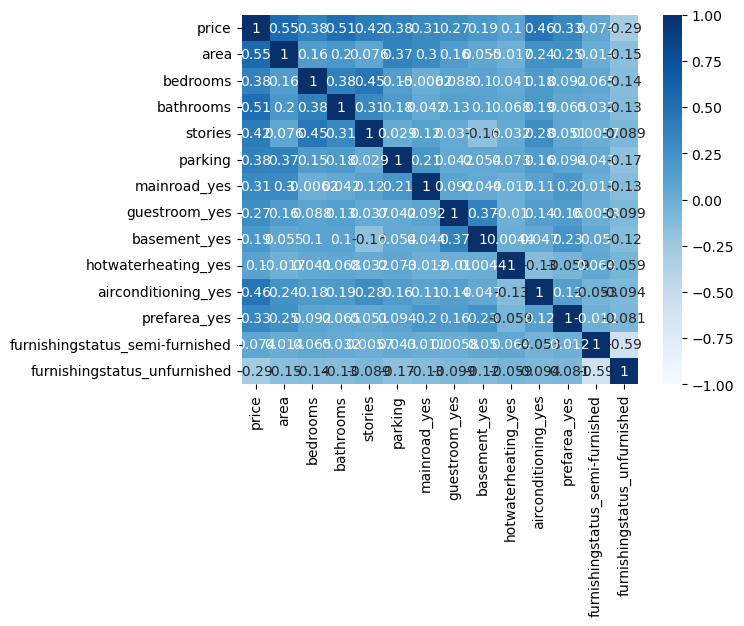

In [56]:
sns.heatmap(data=cor_df,annot=True,vmin=-1,vmax=1,cmap='Blues')

it is difficult to read from heatmap , so we can see how price related to other features like this also : 

In [57]:
corr_matrix = final_df.corr()

price_corr = corr_matrix['price'].sort_values(ascending=False)
print(price_corr)

price                              1.000000
area                               0.553876
bathrooms                          0.508576
airconditioning_yes                0.462496
stories                            0.415874
bedrooms                           0.381802
parking                            0.380769
prefarea_yes                       0.329359
mainroad_yes                       0.309048
guestroom_yes                      0.273506
basement_yes                       0.191375
hotwaterheating_yes                0.102127
furnishingstatus_semi-furnished    0.073943
furnishingstatus_unfurnished      -0.288460
Name: price, dtype: float64


here we can see that some features like area, bathroom, airconditioning_yes, stories, bedroom are highly related to price 

In [104]:
df['price'].mean(), df['price'].min(), df['price'].max()

(np.float64(4727387.963302752), 1750000, 9205000)

# Model training - Supervised / Regrression 

In [59]:
final_df.head(3)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,9205000,7420,4.0,2.0,3.0,2.0,1,0,0,0,1,1,0,0
1,9205000,8960,4.0,3.5,3.5,2.5,1,0,0,0,1,0,0,0
2,9205000,9960,3.0,2.0,2.0,2.0,1,0,1,0,0,1,1,0


In [60]:
final_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

### train - test split

In [64]:
X=final_df.drop(columns='price')

In [65]:
X

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4.0,2.0,3.0,2.0,1,0,0,0,1,1,0,0
1,8960,4.0,3.5,3.5,2.5,1,0,0,0,1,0,0,0
2,9960,3.0,2.0,2.0,2.0,1,0,1,0,0,1,1,0
3,7500,4.0,2.0,2.0,2.5,1,0,1,0,1,1,0,0
4,7420,4.0,1.0,2.0,2.0,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2.0,1.0,1.0,2.0,1,0,1,0,0,0,0,1
541,2400,3.0,1.0,1.0,0.0,0,0,0,0,0,0,1,0
542,3620,2.0,1.0,1.0,0.0,1,0,0,0,0,0,0,1
543,2910,3.0,1.0,1.0,0.0,0,0,0,0,0,0,0,0


In [67]:
y=final_df['price']

In [68]:
y

0      9205000
1      9205000
2      9205000
3      9205000
4      9205000
        ...   
540    1820000
541    1767150
542    1750000
543    1750000
544    1750000
Name: price, Length: 545, dtype: int64

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=67)

### Standardisation 

we do standardisation because we have different features in differenet unit for example area and bedroom, 
so to make everything on same scale we need standardisation 

In [73]:
ss=StandardScaler()

X_train_ft = ss.fit_transform(X_train)
X_test_ft = ss.transform(X_test)

## Linear regression 

In [75]:
model=LinearRegression()

In [76]:
model.fit(X_train_ft,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [77]:
y_pred=model.predict(X_test_ft)

In [81]:
from sklearn.metrics import mean_squared_error, r2_score

In [90]:
mse=mean_squared_error(y_test,y_pred)

In [91]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 1029905.5781250003


In [93]:
r2_score_result=r2_score(y_test,y_pred)

In [97]:
print("rmse:",rmse)
print("r2_score:",r2_score_result)

rmse: 1029905.5781250003
r2_score: 0.5757840754044661


This indicates that the model is able to explain about 57.6% of the variance in house prices. While the RMSE shows that predictions can deviate by around 1 million units on average, this is expected given the wide range of property prices in the dataset.


lets try random forest to see if r2 score increased or not 

## Random Forest Regressor 

In [87]:
model=RandomForestRegressor()
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [88]:
y_pred=model.predict(X_test)

In [89]:
r2_score(y_test,y_pred)

0.5757840754044661

In [99]:
print('random_forest_result:',r2_score(y_test,y_pred))

random_forest_result: 0.5757840754044661


random forest perform even poor , only able to capture 57% of variance in data .
possible reason would be that random forest require big and complex data to find pattern .
we have only 545 rows and 13 columns.


lets try ridge and lasso

## Ridge

In [ ]:
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

In [ ]:
ridge_pred = ridge.predict(X_test)

In [92]:
print('R² (Ridge):', r2_score(y_test, ridge_pred))
print('RMSE (Ridge):', np.sqrt(mean_squared_error(y_test, ridge_pred)))

R² (Ridge): 0.6450151797088715
RMSE (Ridge): 942125.6280963676


## Lasso 

In [ ]:
lasso = Lasso(alpha=0.1)  # small alpha, otherwise it may drop too many features
lasso.fit(X_train, y_train)

In [ ]:
lasso_pred = lasso.predict(X_test)

In [98]:
print("R² (Lasso):", r2_score(y_test, lasso_pred))
print("RMSE (Lasso):", np.sqrt(mean_squared_error(y_test, lasso_pred)))


R² (Lasso): 0.6489367862757005
RMSE (Lasso): 936907.2264719154


To check the possibily of multicollinearity i tried ride and lasso also , although it gives slightly better
result r2 score 64% and a reduction in error but still not satisfactory , this indicate the dataset itself may not contain enough complexity or variation to achieve significantly higher accuracy.